# Machine learning algorithm for S and P 500 stock

In [3]:
import time
import datetime
import pandas as pd
import matplotlib as plt

In [4]:
import yfinance as yf

In [5]:
sp500 = yf.Ticker("^GSPC")

we are setting the sp500 to its ticker, a ticker is the 4 letter word that we use to identify the stock on the stock exchange and in this case GSPC is the unique 4 letter word that is asigned to the sp500 index.

In [6]:
sp500 = sp500.history(period="max")

we are now quering the sp500 data history over the whole max period to then get the data

In [7]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-23 00:00:00-04:00,4210.399902,4255.839844,4189.220215,4217.040039,3776100000,0.0,0.0
2023-10-24 00:00:00-04:00,4235.790039,4259.379883,4219.430176,4247.680176,3821820000,0.0,0.0
2023-10-25 00:00:00-04:00,4232.419922,4232.419922,4181.419922,4186.770020,3869370000,0.0,0.0


We can now see we have a matrix with each row assigned to a date and each colomn giving the specific details about the stock being traded on the date. This is shown in a pandas data frame.

open = what the price was when the market was open

High = highest price the stock was exchanged on that day

Low = was the was lowest price exchanged on that day

Close = what the price was when the market was closed

Volume = was the amount of stocks that was exchanged on the day

Dividends = is the price the stock pays however as S and P is an index it doesn't give any dividens 

Stock Splits = if stocks have split into or has been merged together


In [8]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-10-16 00:00:00-04:00', '2023-10-17 00:00:00-04:00',
               '2023-10-18 00:00:00-04:00', '2023-10-19 00:00:00-04:00',
               '2023-10-20 00:00:00-04:00', '2023-10-23 00:00:00-04:00',
               '2023-10-24 00:00:00-04:00', '2023-10-25 00:00:00-04:00',
               '2023-10-26 00:00:00-04:00', '2023-10-27 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24072, freq=None)

first colomn in the matrix, Date

<Axes: xlabel='Date'>

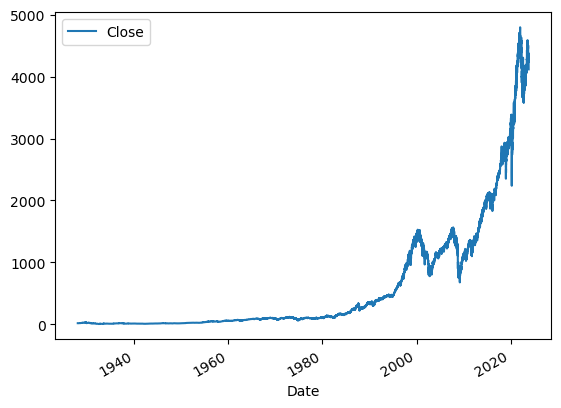

In [9]:
sp500.plot.line(y="Close", use_index=True)

What we did above was having the closing value of the stock as the y axis and the date in ascending order on the x axis 

In [10]:
del sp500["Dividends"]
del sp500["Stock Splits"]

I just removed the Dividends and Stock split as its not required to look at in an index 

# What we want in this is model is to predict whether the stock will increase or decrease instead of finding the exact value the stock will get to.
The reason we do this is due to the fact that there's can be a discrepencey between the value we get and if the stock goes up and down as we can predict that if it goes up and if it up we can lose money that we can get and also we put money as it goes up ealier on in the market which is higher than the closing value of that day and therefore we can also lose money


In [11]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [12]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-10-23 00:00:00-04:00,4210.399902,4255.839844,4189.220215,4217.040039,3776100000,4247.680176
2023-10-24 00:00:00-04:00,4235.790039,4259.379883,4219.430176,4247.680176,3821820000,4186.770020
2023-10-25 00:00:00-04:00,4232.419922,4232.419922,4181.419922,4186.770020,3869370000,4137.229980


What I did here was I added the tomorrows date as the day +1 close day such that we can see if there was an increase or decrease between the days.

In [13]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

What we have setup is that if tomorrow close date is bigger than the close date of today we return a boolean if its true or not. Then the astype(int) function then returns the boolean as integer.

In [14]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-10-23 00:00:00-04:00,4210.399902,4255.839844,4189.220215,4217.040039,3776100000,4247.680176,1
2023-10-24 00:00:00-04:00,4235.790039,4259.379883,4219.430176,4247.680176,3821820000,4186.770020,0
2023-10-25 00:00:00-04:00,4232.419922,4232.419922,4181.419922,4186.770020,3869370000,4137.229980,0


We can see this as 1 as true when the price goes up and 0 as when the price decrease.

In [15]:
sp500 = sp500.loc["1990-01-01":].copy()

we just made a copy of the original sp500 data however we removed the anything below the 1990 as the data before then was unreliable . The .copy removes any pandas issues we may get in the future.

In [16]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-10-23 00:00:00-04:00,4210.399902,4255.839844,4189.220215,4217.040039,3776100000,4247.680176,1
2023-10-24 00:00:00-04:00,4235.790039,4259.379883,4219.430176,4247.680176,3821820000,4186.770020,0
2023-10-25 00:00:00-04:00,4232.419922,4232.419922,4181.419922,4186.770020,3869370000,4137.229980,0


# Training initial values on the machine learning model

In [17]:
from sklearn.ensemble import RandomForestClassifier

## There are three main types of machine learning algorithms we use:

- ### Supervised learning:
    
    - Uses training data inputs and results to then match to labels. This then can be used to adjust weights in the algorithm to then form a fitted model to get a good precision and good accuracy.
    
    - We can use a classification wich then gives binary output such as s or s'
    
    - We can also use regression which then creates a trend and then follows an output along that trend such as a linear graph to then form a result.


- ### Unsupervised learning:
    
    - As labels aren't provided to say if the algorithm is correct or wrong what occurs is that the data is grouped together on similar trends and then the input is then matched to the group and is then outputed to have a similar trend to that group.          


    


- ### Reinforcement learning:
    
    - We starts with random weights assigned between the neurones and then we use a error function to then optimise the weights such that we get closer to the output we wanted.
    
    - We can optimise in the way we calculate the error and an example of this is a ping pong game and if we the AI wins we can say per move the weight assigned to the correctness of the move will increase and like wise with a loss.


In the model we use supervised learning as we have a training set and we also have labels associated to the targets we want.


## Regression ML and Classification ML:

### Regression ML:

    - Simple linear regression which you can predict a continious value from the relationship between one independent variable and one dependent variable using a straight line.

    - Multiple linear regression works in the same way as linear regression however we can predict multiple independent variables on the same graph using a straight line.

    - Polynomial regression uses a nonlinear relationship between a dependent and independent variable to predict a continious value

### Classification Machine Learning:

    - Decision tree clasification uses each node in the tree as a test case and each edge is a possible value for the attribute. Therefore we start from the top and we follow the edges to each test case until we reach the leaf node.

    - Random forest classification takes random values from the data set and puts it into a random tree and the label from the tree is then used in weighting with other trees until we get an appropiate output.

    - K-nearest neighbor assumes that similar data points are close with each other and then uses this to cluster them values with eachother with certain atributes which then can be used to assign new data points into new clusters.


## Ensemble Methods:

    - There are two catagories one being the averaging methods which builds estimators independently and then uses the average of their probabilities to form a prediction. This is generally better as it reduces the the varience in a single averaging indicator (the range of result) as it uses multiple indicators which generally removes anomilies when identifiying in one averaging indicator.

    - The second method is the boosting which then starts with a week algorithm and then we build of the week algorithm and have a another algorithm that makes up for the biases in the first algorithm. This keeps on occuring until we get a valid output.





In [18]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [19]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [20]:
import pandas as pd

preds = pd.Series(preds, index=test.index)

In [21]:
preds

Date
2023-06-07 00:00:00-04:00    1
2023-06-08 00:00:00-04:00    1
2023-06-09 00:00:00-04:00    1
2023-06-12 00:00:00-04:00    1
2023-06-13 00:00:00-04:00    1
                            ..
2023-10-23 00:00:00-04:00    0
2023-10-24 00:00:00-04:00    1
2023-10-25 00:00:00-04:00    1
2023-10-26 00:00:00-04:00    0
2023-10-27 00:00:00-04:00    0
Length: 100, dtype: int64

In [22]:
Real_target = pd.Series(test["Target"], index=test.index)
Real_target

Date
2023-06-07 00:00:00-04:00    1
2023-06-08 00:00:00-04:00    1
2023-06-09 00:00:00-04:00    1
2023-06-12 00:00:00-04:00    1
2023-06-13 00:00:00-04:00    1
                            ..
2023-10-23 00:00:00-04:00    1
2023-10-24 00:00:00-04:00    0
2023-10-25 00:00:00-04:00    0
2023-10-26 00:00:00-04:00    0
2023-10-27 00:00:00-04:00    0
Name: Target, Length: 100, dtype: int64

In [23]:
precision_score(test["Target"],preds)

0.5

In [24]:
combined = pd.concat([test["Target"], preds], axis=1)

<Axes: xlabel='Date'>

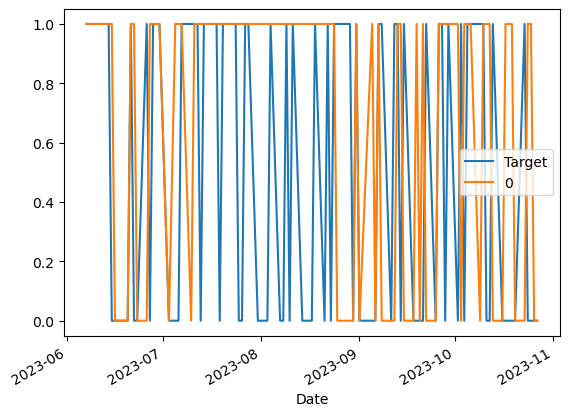

In [25]:
combined.plot()

## Backtesting system

In [26]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [27]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)
    

In [28]:
predictions = backtest(sp500, model, predictors)

In [29]:
predictions["Predictions"].value_counts()

0    3436
1    2586
Name: Predictions, dtype: int64

In [30]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5278422273781903

In [31]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.533045
0    0.466955
Name: Target, dtype: float64

In [32]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages =sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

In [33]:
sp500 = sp500.dropna()

In [34]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_ratio_2,Trend_2,Close_ratio_5,Trend_5,Close_ratio_60,Trend_60,Close_ratio_250,Trend_250,Close_ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-20 00:00:00-04:00,4273.850098,4276.560059,4223.029785,4224.160156,4004030000,4217.040039,0,0.993668,0.0,0.979466,1.0,0.958104,27.0,1.013671,124.0,1.081485,528.0
2023-10-23 00:00:00-04:00,4210.399902,4255.839844,4189.220215,4217.040039,3776100000,4247.680176,1,0.999157,0.0,0.984968,0.0,0.957811,26.0,1.011555,123.0,1.079336,528.0
2023-10-24 00:00:00-04:00,4235.790039,4259.379883,4219.430176,4247.680176,3821820000,4186.770020,0,1.003620,1.0,0.997976,1.0,0.966019,26.0,1.018525,123.0,1.086850,528.0


In [35]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [36]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .7] = 1
    preds[preds < .7] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [37]:
predictions = backtest(sp500, model, new_predictors)

In [38]:
predictions["Predictions"].value_counts()

0.0    5005
1.0      16
Name: Predictions, dtype: int64

In [39]:
precision_score(predictions["Target"],predictions["Predictions"])

0.5625